# CLASSIFICATION - Part 2

In [1]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# this is probably the default, but just in case
%matplotlib inline

## A more complex example

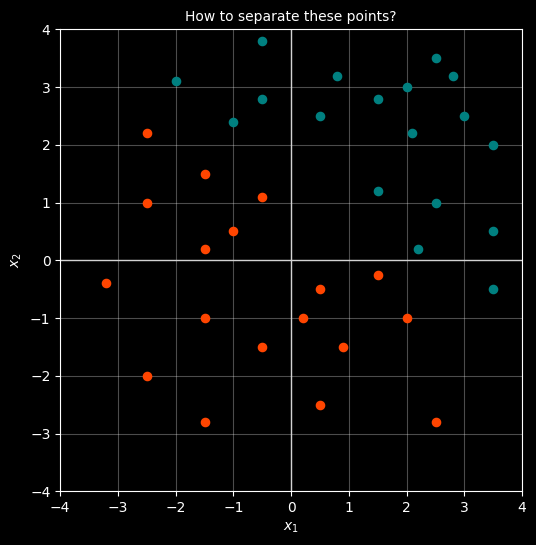

In [23]:
# More points: teal above/right of boundary, red below/left
teal_pts = np.array([
    [ 2.0,  3.0],
    [ 3.0,  2.5],
    [ 2.5,  3.5],
    [ 3.5,  2.0],
    [ 1.5,  2.8],
    [ 2.8,  3.2],
    [-2, 3.1],
    [-1, 2.4],
    [-0.5, 3.8],
    [2.5, 1.0],
    [3.5, 0.5],
    [0.5, 2.5],
    [1.5, 1.2],
    [2.1, 2.2],
    [3.5, -0.5],
    [0.8, 3.2],
    [-0.5, 2.8],
    [2.2, 0.2]
])

red_pts = np.array([
    [-0.5, 1.1],
    [-1.0,  0.5],
    [-2.5,  1.0],
    [ 0.5, -0.5],
    [-1.5,  0.2],
    [ 0.2, -1.0],
    [-1.5, 1.5],
    [-2.5, 2.2],
    [-1.5, -1],
    [-0.5, -1.5],
    [2,-1],
    [1.5, -.25],
    [0.9, -1.5],
    [-2.5, -2],
    [-3.2, -0.4],
    [-1.5, -2.8],
    [2.5, -2.8],
    [0.5, -2.5]
])


with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # plot points
    ax.scatter(teal_pts[:,0], teal_pts[:,1], s=35, color="teal", zorder=3)
    ax.scatter(red_pts[:,0],  red_pts[:,1],  s=35, color="orangered", zorder=3)
    
    
    # axes + grid
    ax.axhline(0, color="lightgray", linewidth=1)
    ax.axvline(0, color="lightgray", linewidth=1)

    
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_title(r"How to separate these points?", fontsize="10")
    
    plt.show()


EPOCH 1
Weight vector: w = [-0.00976521  0.16060546]
Bias term: b = -0.200
Total misclassifications: 2

All Predictions:
Idx   Point                Actual     Predicted  w^T x + b       Status    
--------------------------------------------------------------------------------
0     [2. 3.]              teal       teal       0.792           ✓ CORRECT 
1     [3.  2.5]            teal       teal       0.847           ✓ CORRECT 
2     [2.5 3.5]            teal       teal       0.948           ✓ CORRECT 
3     [3.5 2. ]            teal       teal       0.832           ✓ CORRECT 
4     [1.5 2.8]            teal       teal       0.688           ✓ CORRECT 
5     [2.8 3.2]            teal       teal       0.939           ✓ CORRECT 
6     [-2.   3.1]          teal       teal       0.248           ✓ CORRECT 
7     [-1.   2.4]          teal       teal       0.269           ✓ CORRECT 
8     [-0.5  3.8]          teal       teal       0.578           ✓ CORRECT 
9     [2.5 1. ]            teal      

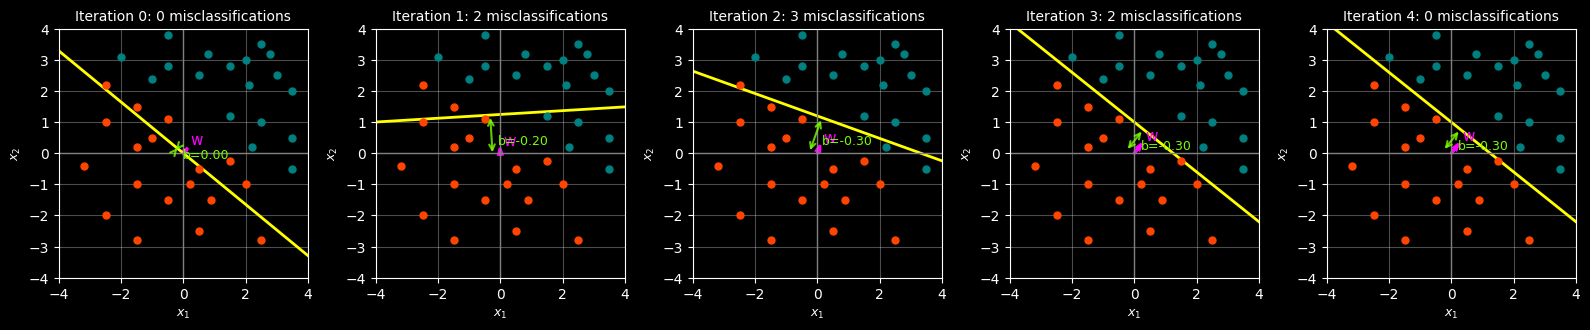


Final weight vector: w = [0.24023479 0.30060546]
Final bias: b = -0.300


In [24]:
# Perceptron with offset

# Run the previous cell first so that the data points are in memory

# Perceptron class with bias
class PerceptronWithBias:
    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
        self.w = np.random.randn(2) * 0.1  # Weight vector
        self.b = 0.0  # Bias term
        self.history_w = [self.w.copy()]
        self.history_b = [self.b]
    
    def predict(self, x):
        """Return 1 if w^T x + b >= 0, else -1"""
        dot_prod = np.dot(self.w, x) + self.b
        return 1 if dot_prod >= 0 else -1
    
    def train_epoch(self, X, y):
        """Train for one epoch, return number of misclassifications and details"""
        mistakes = 0
        mistake_details = []
        all_predictions = []
        
        for idx, (xi, yi) in enumerate(zip(X, y)):
            dot_prod = np.dot(self.w, xi) + self.b
            pred = self.predict(xi)
            actual_label = "teal" if yi == 1 else "red"
            pred_label = "teal" if pred == 1 else "red"
            is_correct = pred == yi
            
            all_predictions.append({
                'idx': idx,
                'point': xi,
                'actual': actual_label,
                'predicted': pred_label,
                'dot_product': dot_prod,
                'correct': is_correct
            })
            
            # If prediction is wrong, update w and b
            if not is_correct:
                # Update: w = w + lr * yi * xi and b = b + lr * yi
                self.w += self.lr * yi * xi
                self.b += self.lr * yi
                mistakes += 1
                mistake_details.append(all_predictions[-1])
        
        self.history_w.append(self.w.copy())
        self.history_b.append(self.b)
        return mistakes, mistake_details, all_predictions

# Prepare data: teal=1, red=-1
X = np.vstack([teal_pts, red_pts])
y = np.hstack([np.ones(len(teal_pts)), -np.ones(len(red_pts))])

# Create an instance of the Perceptron class
perceptron = PerceptronWithBias(learning_rate=0.1)
mistakes_per_epoch = [0]

# Train
for epoch in range(100):  # Allow up to 100 iterations
    mistakes, mistake_details, all_predictions = perceptron.train_epoch(X, y)
    mistakes_per_epoch.append(mistakes)
    
    print(f"\n{'='*80}")
    print(f"EPOCH {epoch+1}")
    print(f"{'='*80}")
    print(f"Weight vector: w = {perceptron.w}")
    print(f"Bias term: b = {perceptron.b:.3f}")
    print(f"Total misclassifications: {mistakes}\n")
    
    # Show all predictions
    print("All Predictions:")
    print(f"{'Idx':<5} {'Point':<20} {'Actual':<10} {'Predicted':<10} {'w^T x + b':<15} {'Status':<10}")
    print("-" * 80)
    for pred in all_predictions:
        status = "✓ CORRECT" if pred['correct'] else "✗ WRONG"
        print(f"{pred['idx']:<5} {str(pred['point']):<20} {pred['actual']:<10} {pred['predicted']:<10} {pred['dot_product']:<15.3f} {status:<10}")
    
    # Show misclassifications in detail
    if mistake_details:
        print(f"\nMisclassified points (that were corrected):")
        print("-" * 80)
        for detail in mistake_details:
            print(f"  Point {detail['idx']}: {detail['point']} -> "
                  f"Predicted {detail['predicted']}, but was actually {detail['actual']} "
                  f"(w^T x + b: {detail['dot_product']:.3f})")
    else:
        print("\n✓ NO MISCLASSIFICATIONS - CONVERGED!")
    
    if mistakes == 0:
        print(f"\nConverged after {epoch+1} epochs!")
        break

# Visualize iterations until convergence
num_iterations = len(perceptron.history_w)
cols = 5
rows = (num_iterations + cols - 1) // cols

with plt.style.context("dark_background"):
    fig, axes = plt.subplots(rows, cols, figsize=(16, 3.5*rows))
    axes = axes.flatten()
    
    for iteration, (w, b, mistakes) in enumerate(zip(perceptron.history_w, perceptron.history_b, mistakes_per_epoch)):
        ax = axes[iteration]
        
        # Plot points
        ax.scatter(teal_pts[:,0], teal_pts[:,1], s=25, color="teal", zorder=3)
        ax.scatter(red_pts[:,0],  red_pts[:,1],  s=25, color="orangered", zorder=3)
        
        # Decision boundary: w^T x + b = 0
        x_range = np.linspace(-4, 4, 100)
        
        if abs(w[1]) > 0.01:  # w2 is not ~0
            x2_boundary = -(w[0] * x_range + b) / w[1]
            ax.plot(x_range, x2_boundary, color="yellow", linewidth=2)
        else:  # boundary is vertical
            ax.axvline(-b / w[0], color="yellow", linewidth=2)
        
        # Weight vector from origin
        ax.arrow(0, 0, w[0], w[1],
                 length_includes_head=True,
                 head_width=0.12, head_length=0.2,
                 linewidth=2, color="fuchsia")
        ax.text(w[0] + 0.1, w[1] + 0.1, "w", color="fuchsia", fontsize=11)
        
        # Visualize bias as perpendicular offset from origin to boundary
        if abs(w[1]) > 0.01 or abs(w[0]) > 0.01:
            w_norm = np.linalg.norm(w)
            # Closest point on boundary to origin
            closest_point = -(b / (w_norm ** 2)) * w
            
            # Perpendicular direction
            w_perp = np.array([-w[1], w[0]]) / w_norm
            offset = 0.25
            
            # Bias measurement line
            start = -0.3 * w + w_perp * offset
            end = closest_point + w_perp * offset
            
            ax.annotate("", xy=end, xytext=start,
                        arrowprops=dict(arrowstyle="<->", color="lawngreen", lw=1.5, alpha=0.8))
            
            mid_point = (start + end) * 0.5
            ax.text(mid_point[0] + 0.2, mid_point[1] - 0.3, f"b={b:.2f}", 
                    color="lawngreen", fontsize=9)
        
        # Axes and grid
        ax.axhline(0, color="grey", linewidth=1)
        ax.axvline(0, color="grey", linewidth=1)
        ax.set_aspect("equal", adjustable="box")
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
        ax.grid(True, alpha=0.3)
        ax.set_xlabel(r"$x_1$", fontsize=9)
        ax.set_ylabel(r"$x_2$", fontsize=9)
        ax.set_title(f"Iteration {iteration}: {mistakes} misclassifications", fontsize=10)
    
    # Hide unused subplots
    for idx in range(num_iterations, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print(f"\n{'='*80}")
print(f"Final weight vector: w = {perceptron.w}")
print(f"Final bias: b = {perceptron.b:.3f}")
print(f"{'='*80}")